## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Classification is used when target outcome is categorical, while regression is used when your target outcome is numeric.
2. It cross-tabulates the true data label again the labels your model predicted, helping you see where your predictions align with reality.
3. Portion of cases your model predicted correctly, it can be insufficient because it hides the specific tpyes of misclassifications the model is making.
4. Quantifies the distance between true values and your model's predicted values
5. Overfitting: Occurs when model is overly sensitive to a handfull of specific datapoints (ex. using too few neighbors) Underfitting: Happens when a model averages over too many observations, returning generic answers close to the overall population average.
6. Models typically overfit the data they are trained for, so splitting the data and evaulating on a test set replicates uncertainty of predicting future values, ensuring you pick a k that actually generalizes well to new data
7. Hard classification returns the most common label among neighbors, providing a definitive prediction. Soft classification returns the probability of each label among the neighbors, useful for understanding the model's confidence or conditional distrubtion of the outcome

In [3]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make. **Since land mine removal is life-or-death, you should tell the agency not to blindly trust the model's top guess. Instead, they should use "soft classification". This makes the model output the exact probability for every single mine type instead of just spitting out one final label. That way, the disposal team can clearly see when the model is unsure and handle the mine with extra caution.**

In [6]:
import pandas as pd

df = pd.read_csv('/content/data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64


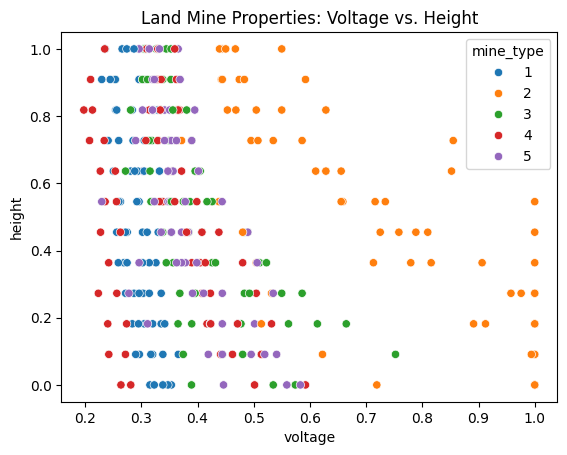

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Summarize the features and the target label
print(df.describe())
print(df['mine_type'].value_counts())

# Visualize relationships between features
sns.scatterplot(data=df, x='voltage', y='height', hue='mine_type', palette='tab10')
plt.title("Land Mine Properties: Voltage vs. Height")
plt.show()


# Define features (X) and target (y)
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

# Scale the numeric features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data evenly into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Test a grid of odd numbers for k to find the best one
k_grid = [ (2*k+1) for k in range(1, 25)]
test_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_accuracies.append(model.score(X_test, y_test))

# Select the optimal k based on test accuracy
best_index = np.argmax(test_accuracies)
best_k = k_grid[best_index]
print(f"Optimal k is: {best_k}")

# Build the final model with the best k and print the Confusion Matrix
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_hat = best_model.predict(X_test)

print(f"Best Accuracy: {accuracy_score(y_test, y_hat)}")
print("\nConfusion Matrix:\n", pd.crosstab(y_test, y_hat))

Optimal k is: 3
Best Accuracy: 0.4260355029585799

Confusion Matrix:
 col_0       1   2   3  4  5
mine_type                  
1          20   0   6  3  8
2           0  26   3  4  0
3           9   3  14  1  5
4          10   5   8  5  8
5           4   1  13  6  7


**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$? **As you increase k, MSE drops at K=50, then begins to climb back up. In the scatterplots, you notice the predictions transition from being wildly scatter everywhere to everything clumping together like a flat horizontal band near the average price.**
5. Determine the optimal $k$ for these data. **Optimal k value is 50 since it produces lowest MSE**
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".) **At low values, the model is overfitting because its overly sensitive to the specific data points, making it more variable, while at higher values, the model is underfitting because it averages over too many cars, giving predictions near overall average instead of predicting based on data at hand**

In [9]:
df = pd.read_csv('/content/data/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keep only the requested variables
df = df[['price', 'year', 'mileage']]

# Check for NAs, view the head, and check dimensions
print("Missing values:\n", df.isna().sum())
print("Dimensions:", df.shape)
print(df.head())

# Drop NAs just in case there are any
df = df.dropna()

# Maxmin normalize year and mileage
scaler = MinMaxScaler()
X = df[['year', 'mileage']]
X_scaled = scaler.fit_transform(X)

# Define the target variable
y = df['price']

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Missing values:
 price      0
year       0
mileage    0
dtype: int64
Dimensions: (2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


k=3 | Mean Squared Error: 148,065,935.52


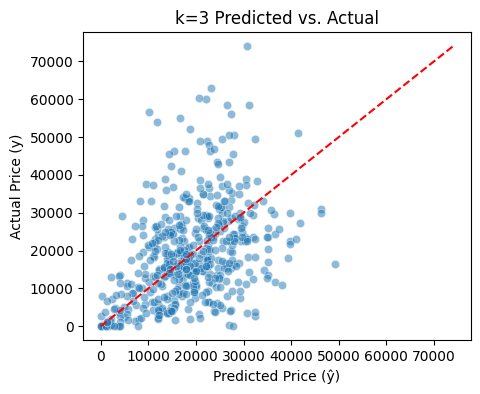

k=10 | Mean Squared Error: 117,399,126.11


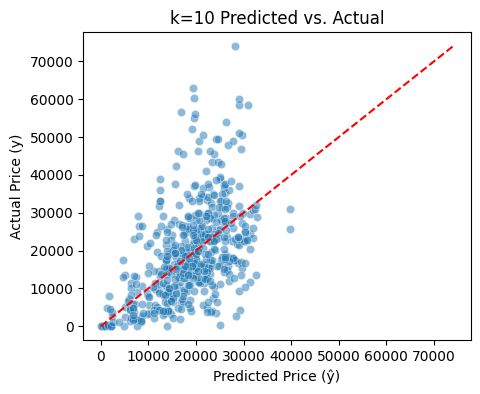

k=25 | Mean Squared Error: 112,576,160.82


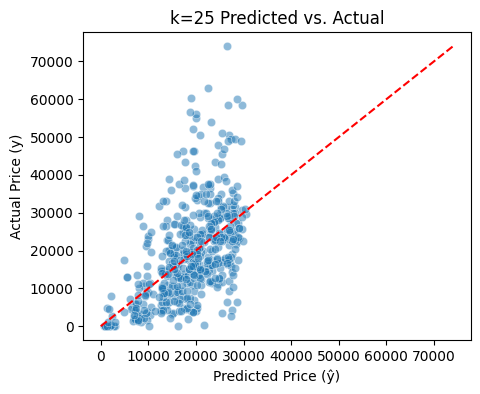

k=50 | Mean Squared Error: 110,202,549.30


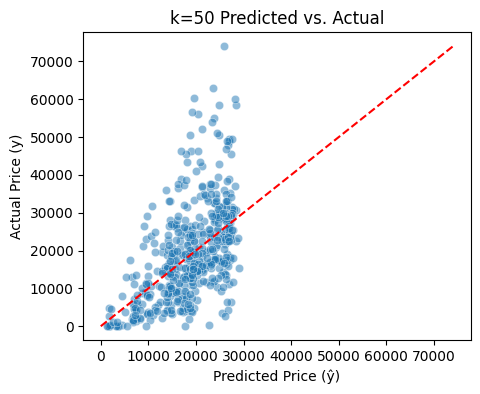

k=100 | Mean Squared Error: 112,253,702.97


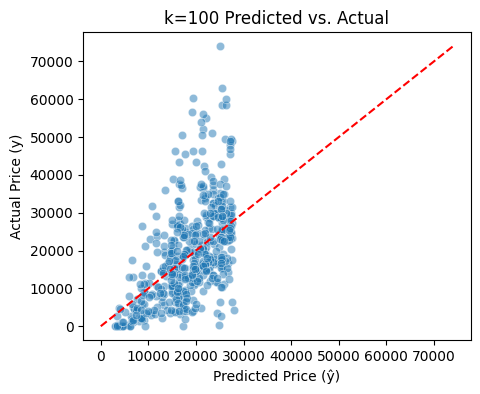

k=300 | Mean Squared Error: 114,496,092.29


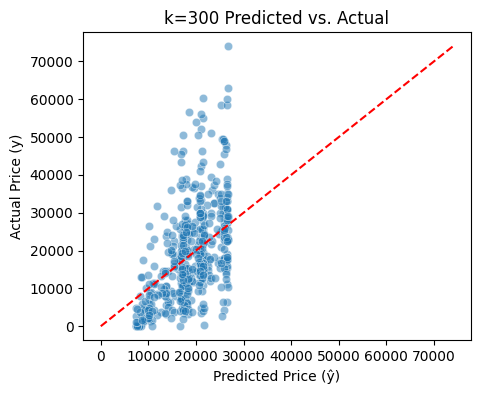

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3,10,25,50,100,300]

for k in k_values:
    # Train the model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_hat = model.predict(X_test)

    # Calculate and print MSE
    mse = mean_squared_error(y_test, y_hat)
    print(f"k={k} | Mean Squared Error: {mse:,.2f}")

    # Plot predicted vs actual prices
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=y_hat, y=y_test, alpha=0.5)

    # Add a perfect prediction line for reference
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Predicted Price (ŷ)")
    plt.ylabel("Actual Price (y)")
    plt.title(f"k={k} Predicted vs. Actual")
    plt.show()

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see. **The plots don't look similar, the predicted shows a massive peak around 90, while the originial training ratings show a more natural variation with smaller peaks between 80 and 100. This most likely happened because the optimal k was very high (97), causing underfitting.**

In [5]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


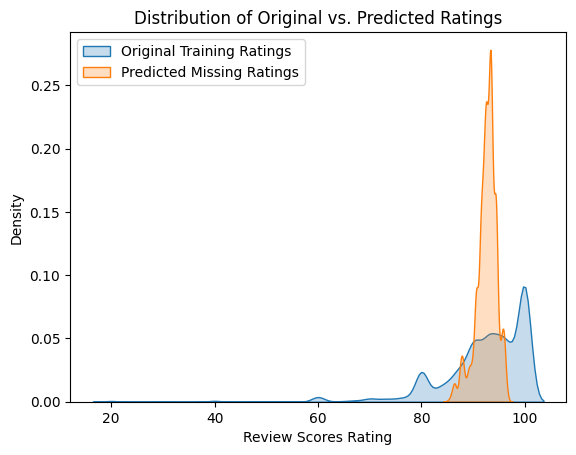

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# Reload the data and filter columns
df = pd.read_csv('/content/data/airbnb_hw.csv')
df = df[['Review Scores Rating', 'Price', 'Beds']]

# Clean the Price column
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

# Separate the missing data FIRST
missing_ratings_df = df.loc[df['Review Scores Rating'].isnull(), :].copy()

# Drop NAs to create the complete cases dataset
df = df.dropna(axis=0, how='any')

# Define and scale features using your complete cases
X = df[['Price', 'Beds']]
y = df['Review Scores Rating']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train the final model with k=97
final_model = KNeighborsRegressor(n_neighbors=97)
final_model.fit(X_scaled, y)

missing_ratings_df = missing_ratings_df.dropna(subset=['Price', 'Beds'])

# Scale the missing data and predict
X_missing = missing_ratings_df[['Price', 'Beds']]
X_missing_scaled = scaler.transform(X_missing)
predicted_ratings = final_model.predict(X_missing_scaled)

# Plot the distributions
sns.kdeplot(y, label='Original Training Ratings', fill=True)
sns.kdeplot(predicted_ratings, label='Predicted Missing Ratings', fill=True)
plt.title("Distribution of Original vs. Predicted Ratings")
plt.legend()
plt.show()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)